In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
soc_net = pd.read_csv(r"C:\Users\Phavour\Downloads\Personal Python-ML project\Simplilearn\Workspace\Logistic Reg Buy-SUV\Social_Network_Ads.csv")
soc_net

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
soc_net.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [4]:
X = soc_net.iloc[:,[2,3]]
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [5]:
y = soc_net.iloc[:,4]
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

<Axes: >

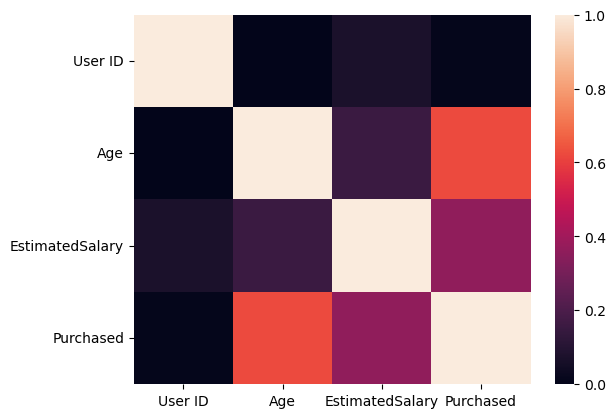

In [6]:
sns.heatmap(soc_net.drop('Gender',axis=1).corr())

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
xtrain,xtest,ytrain,ytest = train_test_split(X, y,test_size=0.3,random_state=42)

In [9]:
# feature scaling for normalization
from sklearn.preprocessing import StandardScaler

x_scaled = StandardScaler()
xtrain = x_scaled.fit_transform(xtrain)
xtest = x_scaled.fit_transform(xtest)


In [10]:
xtest

array([[ 0.73372578, -1.3320301 ],
       [ 1.90289045,  0.58888731],
       [-0.88511762, -0.6917243 ],
       [ 0.91359727,  0.82172578],
       [-0.79518187, -1.15740124],
       [-0.70524613, -0.16783773],
       [ 0.82366152,  1.14187868],
       [-0.79518187,  0.44336326],
       [ 0.19411131,  0.21052479],
       [ 0.3739828 , -0.08052331],
       [-0.25556741, -0.08052331],
       [ 1.36327599, -0.98277239],
       [-1.33479634, -0.57530506],
       [-1.60460357, -1.30292529],
       [-0.70524613,  0.5597825 ],
       [-0.25556741,  1.17098349],
       [ 1.27334024, -0.86635315],
       [ 0.73372578,  0.18141998],
       [ 0.10417557, -0.74993392],
       [ 1.63308322, -0.22604735],
       [-1.42473208, -1.18650605],
       [-0.79518187,  0.35604883],
       [ 0.82366152, -1.30292529],
       [ 1.90289045,  0.2396296 ],
       [-1.69453931, -1.41934453],
       [ 1.1834045 , -1.30292529],
       [ 0.3739828 ,  0.35604883],
       [-0.07569592, -0.42978102],
       [ 1.54314748,

In [11]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)

model.fit(xtrain,ytrain)

LogisticRegression(random_state=0)

In [12]:
y_predict = model.predict(xtest)
y_predict

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [13]:
model.score(xtrain, ytrain)

0.8285714285714286

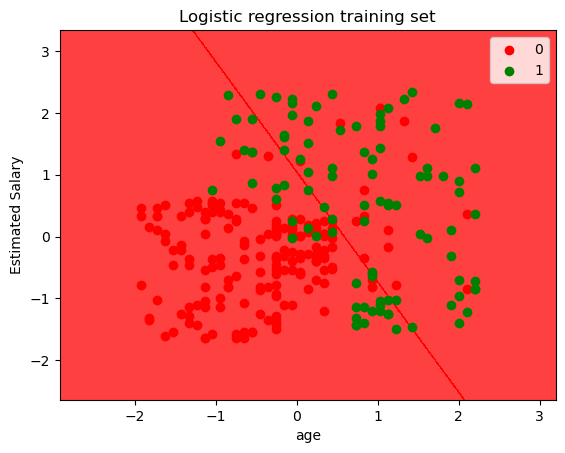

In [24]:
from matplotlib.colors import ListedColormap
x_set, y_set = xtrain, ytrain

X1, X2 = np.meshgrid(np.arange(start =x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() +1, step = 0.01))

plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap("red",'green'))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

colors = ListedColormap(['red', 'green'])

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                color=colors(i), label=j)


plt.title("Logistic regression training set")
plt.xlabel("age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()

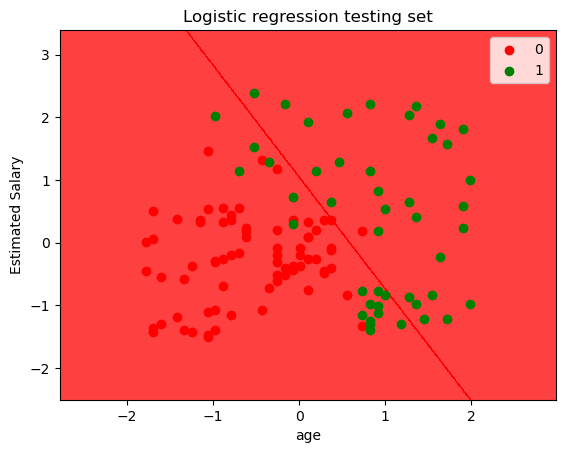

In [25]:
from matplotlib.colors import ListedColormap
x_set, y_set = xtest, ytest

X1, X2 = np.meshgrid(np.arange(start =x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() +1, step = 0.01))

plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap("red",'green'))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

colors = ListedColormap(['red', 'green'])

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                color=colors(i), label=j)


plt.title("Logistic regression testing set")
plt.xlabel("age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()

In [29]:
from sklearn.metrics import confusion_matrix
cm =confusion_matrix(ytest, y_predict)
cm

array([[72,  1],
       [17, 30]], dtype=int64)

In [27]:
accuracy = (72+30)/100

In [28]:
accuracy

1.02